# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [5]:
# Step 1: Begin by importing the required libraries.

import pandas as pd
# Step 2: Fetch the dataset using the provided URL.
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(data_url, delimiter='|')

# Step 3: The dataset has been assigned to the variable 'users' for further processing.

# Step 4: Compute the average age for each occupation.
mean_age_by_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Determine the male proportion for each occupation and arrange it in descending order.
def calculate_male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = len(group)
    return male_count / total_count

male_ratio_by_occupation = users.groupby('occupation').apply(calculate_male_ratio)
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

# Step 6: Compute the minimum and maximum ages within each occupation.
age_range_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: Determine the average age for each combination of occupation and gender.
mean_age_by_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8: Compute the proportion of females and males for each occupation.
def calculate_gender_percentage(group):
    total_count = len(group)
    female_count = (group['gender'] == 'F').sum()
    male_count = total_count - female_count
    return {
        'percentage_female': (female_count / total_count) * 100,
        'percentage_male': (male_count / total_count) * 100
    }

gender_percentage_by_occupation = users.groupby('occupation').apply(calculate_gender_percentage)

# Print or display the results for each calculated metric
print("Mean Age by Occupation:\n", mean_age_by_occupation)
print("\nMale Ratio by Occupation (sorted):\n", male_ratio_by_occupation)
print("\nAge Range by Occupation:\n", age_range_by_occupation)
print("\nMean Age by Occupation and Gender:\n", mean_age_by_combination)
print("\nGender Percentage by Occupation:\n", gender_percentage_by_occupation)


Mean Age by Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio by Occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other      

# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [8]:
# Step 1: Import the required libraries
import pandas as pd

# Step 2: Import the Euro 2012 dataset
data_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(data_url)

# Step 4: Extract the 'Goals' column
goals_column = euro12['Goals']

# Step 5: Calculate the number of participating teams in Euro 2012
num_participating_teams = euro12.shape[0]

# Step 6: Calculate the number of columns in the dataset
num_dataset_columns = euro12.shape[1]

# Step 7: Create a DataFrame with 'Team', 'Yellow Cards', and 'Red Cards' columns
discipline_data = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by 'Red Cards' and then 'Yellow Cards'
discipline_sorted = discipline_data.sort_values(by=['Red Cards', 'Yellow Cards'])

# Step 9: Calculate the mean number of Yellow Cards per team
mean_yellow_cards_per_team = discipline_data['Yellow Cards'].mean()

# Step 10: Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]

# Step 11: Select teams whose names start with 'G'
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12: Select the first 7 columns of the dataset
first_7_columns = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3 columns
columns_except_last_3 = euro12.iloc[:, :-3]

# Step 14: Extract the 'Shooting Accuracy' of England, Italy, and Russia
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

# Print the results
print("Number of participating teams in Euro 2012:", num_participating_teams)
print("Number of columns in the dataset:", num_dataset_columns)
print("Mean number of Yellow Cards per team:", mean_yellow_cards_per_team)
print("\nTeams that scored more than 6 goals:\n", high_scoring_teams)
print("\nTeams whose names start with 'G':\n", teams_starting_with_G)
print("\nFirst 7 columns of the dataset:\n", first_7_columns)
print("\nColumns except the last 3 columns:\n", columns_except_last_3)
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Number of participating teams in Euro 2012: 16
Number of columns in the dataset: 35
Mean number of Yellow Cards per team: 7.4375

Teams that scored more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0   

# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [9]:
import pandas as pd
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 2, size=100))
series2 = pd.Series(np.random.randint(1, 3, size=100))
series3 = pd.Series(np.random.randint(10000, 29000, size=100))

# Step 3
data = {'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3}
df = pd.DataFrame(data)

# Step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True))

# Step 6
# The index should go up to 299 because we concatenated three series of length 100 each.
# So, the indices should go from 0 to 299.
print(bigcolumn.index.max() == 299)  # This will print True if the index goes up to 299.

# Step 7
df = df.reindex(range(300))

# Print the first few rows of the DataFrame
print(df.head())


True
   bedrs  bathrs  price_sqr_meter
0    1.0     2.0          21056.0
1    1.0     2.0          18803.0
2    1.0     2.0          18741.0
3    1.0     2.0          14262.0
4    1.0     1.0          10203.0


# Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks.

In [3]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset and replace the first 3 columns by a proper datetime index
data = pd.read_csv('C:\\Users\\Prince Singla\\Downloads\\Wind.txt', delim_whitespace=True, parse_dates=[[0, 1, 2]])

data.set_index('Yr_Mo_Dy', inplace=True)

# Step 3: Fix the year 2061
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: pd.Timestamp(fix_year(x.year), x.month, x.day))

# Step 4: Set the data type of the index to datetime
data.index = pd.to_datetime(data.index)
  
# Step 5: Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Step 6: Count non-missing values in total
non_missing_values_total = data.notnull().sum().sum()

# Step 7: Calculate the mean windspeed over all locations and times
mean_windspeed_total = data.mean().mean()

# Step 8: Calculate min, max, mean, and standard deviation for each location
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

# Step 9: Calculate min, max, mean, and standard deviation for each day
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 10: Resample to yearly frequency
yearly_data = data.resample('Y').mean()

# Step 11: Resample to monthly frequency
monthly_data = data.resample('M').mean()

# Step 12: Resample to weekly frequency and calculate min, max, mean, and std for the first 52 weeks
weekly_data = data.resample('W-MON').apply(lambda x: x.head(52).agg(['min', 'max', 'mean', 'std']))

# Print the results or perform further analysis as needed
print("Missing Values per Location:")
print(missing_values_per_location)
print("\nNon-Missing Values in Total:")
print(non_missing_values_total)
print("\nMean Windspeed over all Locations and Times:")
print(mean_windspeed_total)
print("\nLocation Statistics:")
print(loc_stats)
print("\nDay Statistics:")
print(day_stats)
print("\nYearly Data:")
print(yearly_data)
print("\nMonthly Data:")
print(monthly_data)
print("\nWeekly Data (first 52 weeks):")
print(weekly_data)


Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Non-Missing Values in Total:
78857

Mean Windspeed over all Locations and Times:
10.227982360836938

Location Statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day Statistics:
             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [10]:
import pandas as pd

# Step 2
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
#step 3
print (chipo)

# Step 4
print(chipo.head(10))

# Step 5
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

# Step 6
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

# Step 7
print("Columns:", chipo.columns)

# Step 8
print("Index:", chipo.index)

# Step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

# Step 10
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity ordered for most-ordered item:", most_ordered_item_count)

# Step 11
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered choice description:", most_ordered_choice_description)

# Step 12
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

# Step 13
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipo['item_price'].dtype)

# Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

# Step 15
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16
average_revenue_per_order = revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)

# Step 17
num_different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items_sold)


      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

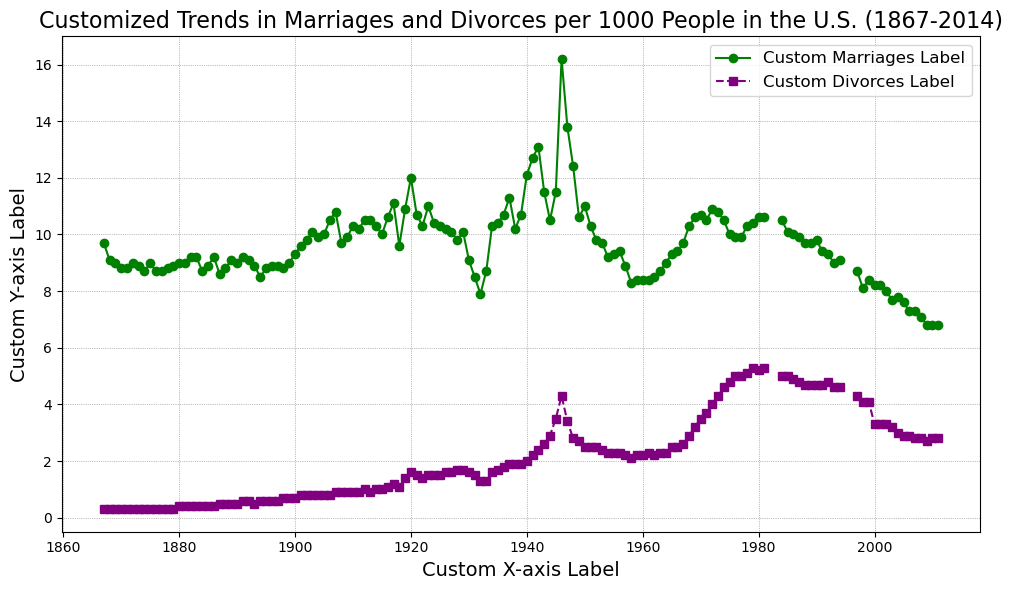

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data_file_path = "C:/Users/Prince Singla/us-marriages-divorces-1867-2014.csv"
marriage_divorce_df = pd.read_csv(data_file_path)

# Extract relevant columns
years = marriage_divorce_df['Year']
marriages_per_1000 = marriage_divorce_df['Marriages_per_1000']
divorces_per_1000 = marriage_divorce_df['Divorces_per_1000']

# Create a line plot with custom style
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_1000, label='Custom Marriages Label', color='green', marker='o')
plt.plot(years, divorces_per_1000, label='Custom Divorces Label', linestyle='dashed', color='purple', marker='s')

# Add labels and title with style
plt.xlabel('Custom X-axis Label', fontsize=14)
plt.ylabel('Custom Y-axis Label', fontsize=14)
plt.title('Customized Trends in Marriages and Divorces per 1000 People in the U.S. (1867-2014)', fontsize=16)

# Add legend with custom location
plt.legend(loc='upper right', fontsize=12)

# Customize grid appearance
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Adjust plot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

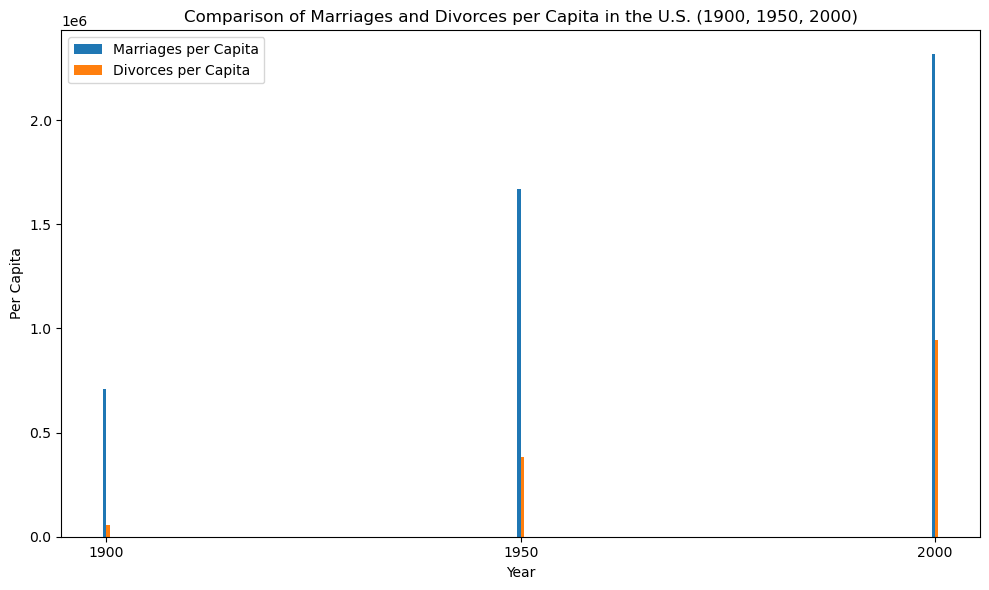

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'marriage_and_divorce_data.csv' with your file's path)
data = pd.read_csv("C:\\Users\\Prince Singla\\Downloads\\us-marriages-divorces-1867-2014 (2).csv")

# List of years for which you want to compare data
years_of_interest = [1900, 1950, 2000]

# Extract marriages and divorces data for the specified years
marriages_per_capita = data[data['Year'].isin(years_of_interest)]['Marriages']
divorces_per_capita = data[data['Year'].isin(years_of_interest)]['Divorces']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(years_of_interest, marriages_per_capita, width=bar_width, label='Marriages per Capita')
plt.bar([year + bar_width for year in years_of_interest], divorces_per_capita, width=bar_width, label='Divorces per Capita')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([year + bar_width / 2 for year in years_of_interest], years_of_interest)
plt.legend()

# Display the plot with adjusted layout
plt.tight_layout()

# Show the plot
plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

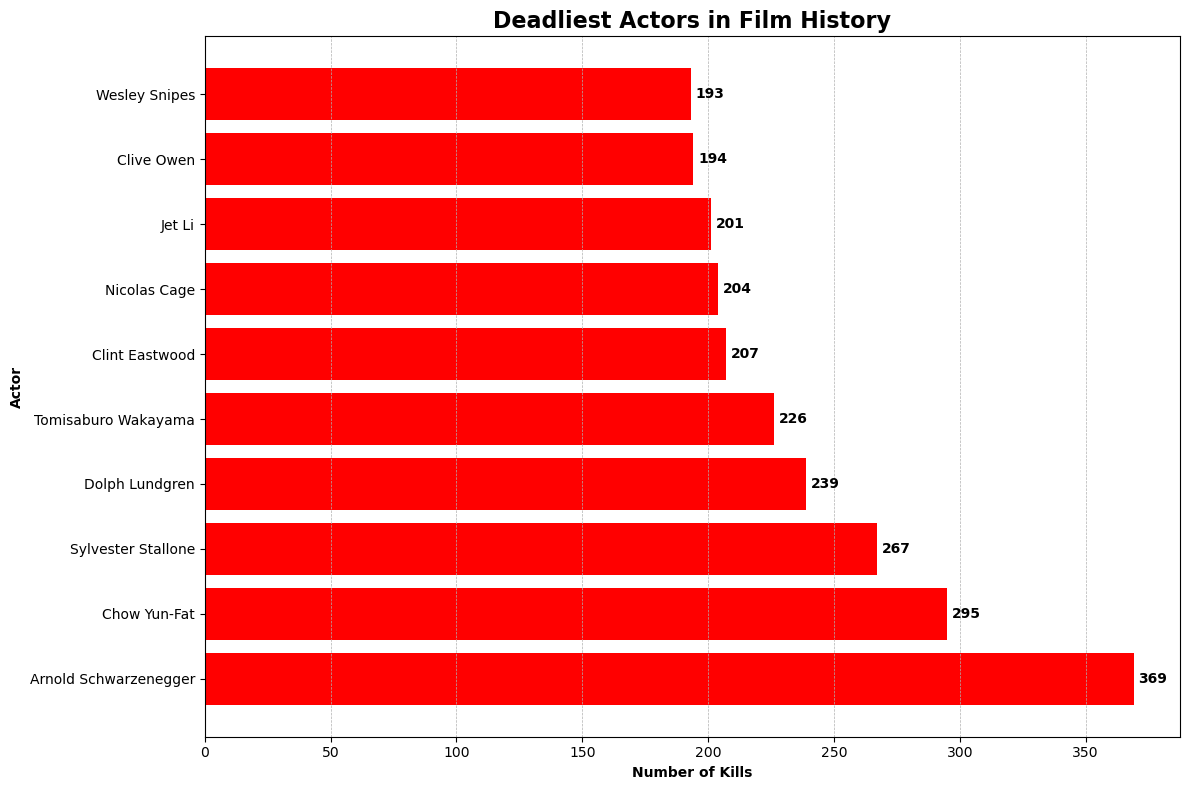

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data_file_path = "C:\\Users\\Prince Singla\\actor_kill_counts.csv"
actor_kill_data = pd.read_csv(data_file_path)

# Sort the data by kill count in descending order
sorted_actor_kill_data = actor_kill_data.sort_values(by='Count', ascending=False)

# Create a distinctive style for the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_actor_kill_data['Actor'], sorted_actor_kill_data['Count'], color='red')

# Add bold labels for axes, title, and grid
plt.xlabel('Number of Kills', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Film History', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Add a label for each bar with the actor's name and kill count
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', fontweight='bold')

# Display the chart with an adjusted layout
plt.tight_layout()

# Show the plot
plt.show()




# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

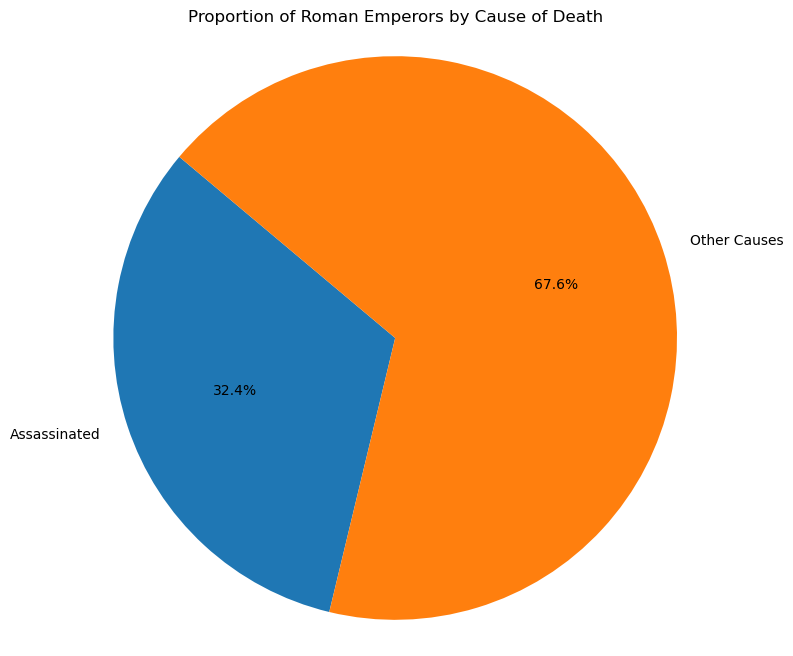

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'roman_emperors.csv' with your file's path)
data = pd.read_csv("C:\\Users\\Prince Singla\\Downloads\\roman-emperor-reigns (1).csv")

# Count the number of emperors assassinated and those with other causes of death
assassinated_emperors_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
other_causes_emperors_count = data.shape[0] - assassinated_emperors_count

# Create data for the pie chart
cause_labels = ['Assassinated', 'Other Causes']
cause_sizes = [assassinated_emperors_count, other_causes_emperors_count]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cause_sizes, labels=cause_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Add title
plt.title('Proportion of Roman Emperors by Cause of Death')

# Show the plot
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

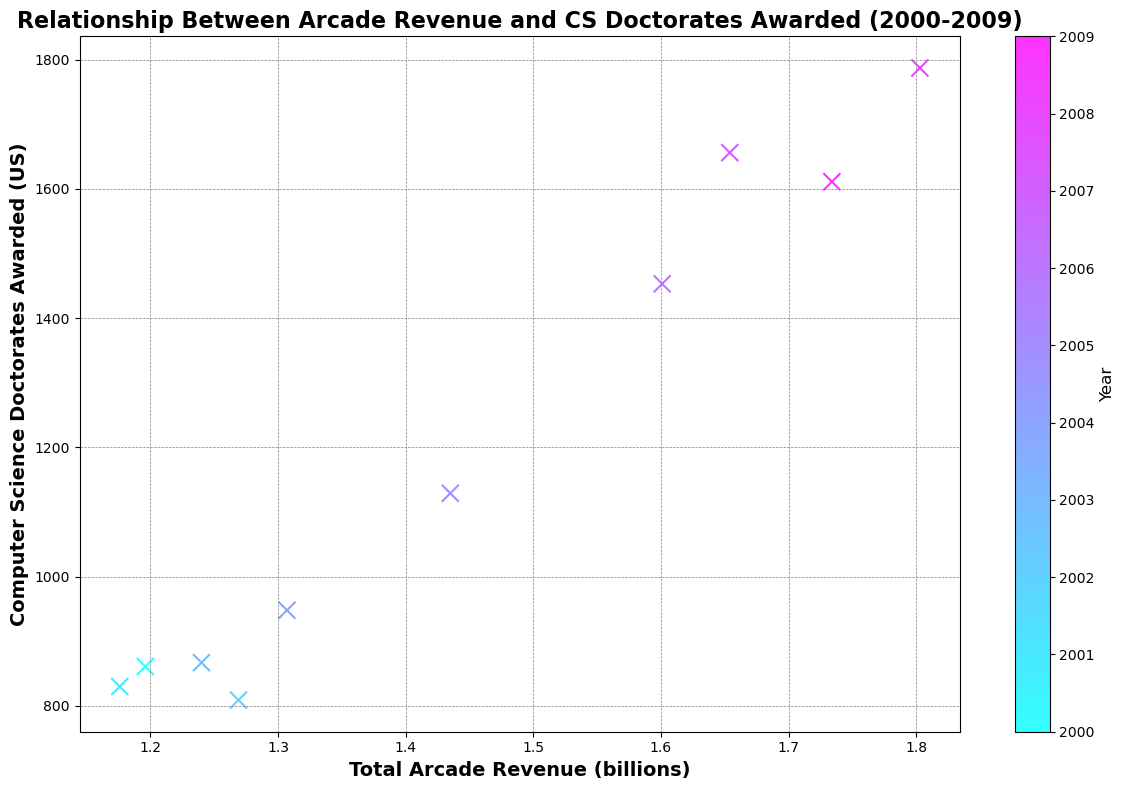

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_file_path = "C:\\Users\\Prince Singla\\arcade-revenue-vs-cs-doctorates.csv"
data_df = pd.read_csv(data_file_path)

# Extract the data
years = data_df["Year"]
arcade_revenue_billions = data_df["Total Arcade Revenue (billions)"]
cs_doctorates_awarded = data_df["Computer Science Doctorates Awarded (US)"]

# Create a scatter plot with a distinctive style
plt.figure(figsize=(12, 8))
plt.scatter(arcade_revenue_billions, cs_doctorates_awarded, c=years, cmap="cool", s=150, marker='x', alpha=0.8)

# Add labels and title with bold font
plt.xlabel("Total Arcade Revenue (billions)", fontsize=14, fontweight='bold')
plt.ylabel("Computer Science Doctorates Awarded (US)", fontsize=14, fontweight='bold')
plt.title("Relationship Between Arcade Revenue and CS Doctorates Awarded (2000-2009)", fontsize=16, fontweight='bold')

# Add a colorbar indicating the years
cbar = plt.colorbar()
cbar.set_label("Year", fontsize=12)

# Add grid lines with custom style
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust plot layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
